**Red Neuronal Recurrente** - Daniel Conrado Monroy Madrid 16012674

In [0]:
from google.colab import drive
drive.mount('/content/drive/',force_remount=True)

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive/


In [0]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

Using TensorFlow backend.


In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [0]:
def import_data(dataset): #dataset es un string.csv 
  path = "/content/drive/My Drive/datasets/"
  file_name = dataset
  dataset = pd.read_csv(path+file_name,encoding = "utf-8",engine='python')
  return dataset

In [0]:
data = import_data('serie.csv')
data.head()

,Fecha,Compra,Venta,TCR 1/
0,02/12/2006,7.63900,7.63900,NaN
1,03/12/2006,7.63900,7.63900,NaN
2,04/12/2006,7.63900,7.63900,NaN
3,05/12/2006,7.63729,7.63729,NaN
4,06/12/2006,7.64211,7.64211,NaN


In [0]:
data.info() # en las últimas se encuentra texto como "Fuente: Banco de Guatemala" en la columna de fecha, por ello los nulls en las columnas de compra y venta.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4644 entries, 0 to 4643
Data columns (total 4 columns):
Fecha     4644 non-null object
Compra    4640 non-null float64
Venta     4640 non-null float64
TCR 1/    0 non-null float64
dtypes: float64(3), object(1)
memory usage: 145.2+ KB


In [0]:
# En este caso, el valor de compra es igual al de venta, por lo que el nuevo dataset quedaría de la siguiente forma: 
# De igual manera, se eliminan las filas donde hay texto que el Banco Central pone al final de los datos. 
dataset = data.iloc[0:4640,0:2]
dataset.head()

,Fecha,Compra
0,02/12/2006,7.63900
1,03/12/2006,7.63900
2,04/12/2006,7.63900
3,05/12/2006,7.63729
4,06/12/2006,7.64211


In [0]:
dataset = dataset.rename(columns={'Fecha':'Fecha','Compra': 'Tipo de cambio'})
dataset['Fecha'] = pd.to_datetime(dataset['Fecha']) #cambiar formato de fecha para que lo reconozca pandas
dataset.tail()

,Fecha,Tipo de cambio
4635,2019-11-08,7.66499
4636,2019-12-08,7.66867
4637,2019-08-13,7.67125
4638,2019-08-14,7.67325
4639,2019-08-15,7.67325


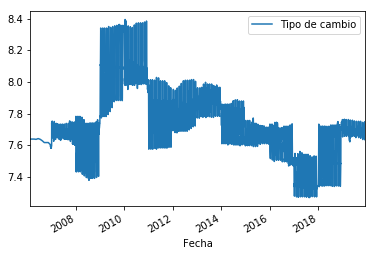

In [0]:
#Gráfica de la serie
serie = dataset.copy()
graf = serie.set_index(["Fecha"], drop=True)
graf.plot()
plt.show()

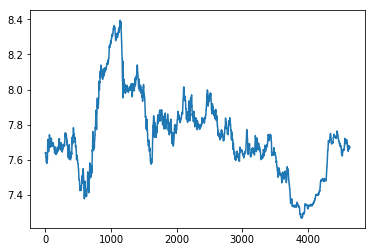

In [0]:
plt.plot(dataset['Tipo de cambio'])
plt.show()

In [0]:
#normalizar la data
scaler = MinMaxScaler(feature_range=(0,1))
features = scaler.fit_transform(dataset['Tipo de cambio'].values.reshape(-1,1)) #una única variable (Tipo de cambio)
variables = pd.DataFrame(features,columns=['Tipo de cambio'])
variables.head()

,Tipo de cambio
0,0.328441
1,0.328441
2,0.328441
3,0.326921
4,0.331204


Preparar data para la serie de tiempo

In [0]:
lookback = 10 #10 días hacia atrás 
X, Y = [], []
for i in range(len(dataset)-lookback-1):
	a = features[i:(i+lookback), 0]
	X.append(a)
	Y.append(features[i + lookback, 0])

In [0]:
X_train = np.array(X)
y_train = np.array(Y)
train_size = int(len(dataset) * 0.8) #80% para entrenar
test_size = len(dataset) - train_size
X_test = X_train[:test_size+lookback]
x_train = np.reshape(X_train, (X_train.shape[0], 1, X_train.shape[1]))
x_test = np.reshape(X_test, (X_test.shape[0], 1, X_test.shape[1]))

In [0]:
print(x_train.shape)
print(x_test.shape)

(4629, 1, 10)
(938, 1, 10)


In [0]:
model = Sequential()
model.add(LSTM(30, return_sequences= True, input_shape=(x_train.shape[1],10)))
model.add(LSTM(30, return_sequences=True))
model.add(LSTM(30))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(x_train, y_train, epochs=200, batch_size=32)
prediccion = model.predict(x_test) #prediccion con test ya que fue entrenado 
model.summary()

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Epoch 1/200
4629/4629 [==============================] - 3s 670us/step - loss: 0.0404
Epoch 2/200
4629/4629 [==============================] - 1s 169us/step - loss: 0.0011
Epoch 3/200
4629/4629 [==============================] - 1s 172us/step - loss: 6.5226e-04
Epoch 4/200
4629/4629 [==============================] - 1s 162us/step - loss: 4.8339e-04
Epoch 5/200
4629/4629 [==============================] - 1s 159us/step - loss: 4.3966e-04
Epoch 6/200
4629/4629 [==============================] - 1s 161us/step - loss: 4.2416e-04
Epoch 7/200
4629/4629 [==============================] - 1s 169us/step - loss: 3.9088e-04
Epoch 8/200
4629/4629 [==============================] - 1s 182us/step - loss: 3.6902e-04
Epoch 9/200
4629/4629 [==============================] - 1s 170us/step - loss: 3.5045e-04
Epoch 10/200
4629/4629 [==============================] - 1s 173us/step - loss: 3.1798e-04
Epoch 11/20

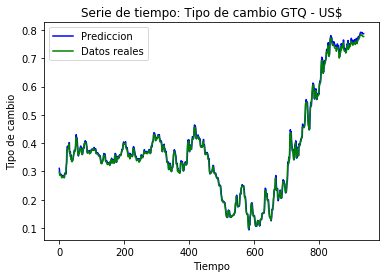

In [0]:
plt.plot(prediccion, color= 'blue')
plt.plot(features[lookback:test_size+(2*lookback),0], color='green')
plt.title("Serie de tiempo: Tipo de cambio GTQ - US$")
plt.xlabel("Tiempo")
plt.ylabel("Tipo de cambio")
plt.legend(['Prediccion', 'Datos reales'], loc='upper left')
plt.show()

Como se puede observar, la predicción (azul) fue bastante buena en relación a los valores reales (verde). 